# Task 1. Data Quality Check
Do you have all the relevant fields in the raw data file given to you? : Yes
Convert the given json data to a csv file : done
Create a data quality report (the format of this report must be decided by the learner) to check:
a. The data type of each variable
b. If a variable is numeric in nature, then, the numeric summary (Min, Max, Mean,25th percentile, Median, 75th percentile, 90th percentile, 95th percentile, number of zeros and number of unique values, number of missing values, percentage of missing values) must be computed.
c. If a variable is string variable, then find out the number of unique values, number of missing values, percentage of missing values.
After the data quality report is created you need to :
a. Check if there is any variable whose data-type needs to be changed 
b. Identify the type of data cleaning needed for different columns in the data
c. Handle missing data appropriately d. In case there are extreme values present in a variable do the appropriate treatment.

# Do you have all the relevant fields in the raw data file given to you? : Yes

In [1]:
#File reading path using os :

import os
os.chdir(r'C:\Users\anishkaa.choudhary\Desktop\DS\Retention-Project')
os.getcwd()



'C:\\Users\\anishkaa.choudhary\\Desktop\\DS\\Retention-Project'

In [3]:
#Reading the json file and converting to csv :
import pandas as pd
df = pd.read_json('Retentionn.json')
df.to_csv('Retentionn.csv', index = None)

#Using transpose to interchange the row to column and vice-versa :
df2 = df.T

In [4]:
df2.describe()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,54030,54030,54030,54030,54030,54030,54030,54030,54030,54030
unique,2,110,49994,3,2,2,2,14,2,5677
top,F,23 years,$ 451931.22,Individuals,0,I,0,1,0,716
freq,29681,3080,29,32607,51335,29026,28686,27817,53524,226


In [5]:
# a. The data type of each variable
df2.dtypes


gender                   object
age                      object
gross_income             object
segment                  object
num_credit_cards         object
tiprel_1mes              object
ind_actividad_cliente    object
num_Products             object
num_loans                object
duration                 object
dtype: object

In [6]:
# Maximum
print("\n----------- Calculate Minimum -----------\n")
df2.min()



----------- Calculate Minimum -----------



gender                                   F
age                               10 years
gross_income                   $ 100004.31
segment                  College_Graduated
num_credit_cards                         0
tiprel_1mes                              A
ind_actividad_cliente                    0
num_Products                             0
num_loans                                0
duration                               366
dtype: object

In [7]:
# Minimum
print("\n----------- Calculate Maximum-----------\n")
df2.max()


----------- Calculate Maximum-----------



gender                           M
age                       99 years
gross_income             $ 99994.2
segment                        VIP
num_credit_cards                 1
tiprel_1mes                      I
ind_actividad_cliente            1
num_Products                    13
num_loans                        1
duration                      7909
dtype: object

In [8]:
# Mean,Median and Mode
print("\n----------- Calculate Mean -----------\n")
print(df2.mean())
 
print("\n----------- Calculate Median -----------\n")
print(df2.median())
 
print("\n----------- Calculate Mode -----------\n")
print(df2.mode())



----------- Calculate Mean -----------

num_credit_cards            0.049880
ind_actividad_cliente       0.469073
num_Products                1.536017
num_loans                   0.009365
duration                 2913.936665
dtype: float64

----------- Calculate Median -----------

num_credit_cards            0.0
ind_actividad_cliente       0.0
num_Products                1.0
num_loans                   0.0
duration                 2039.5
dtype: float64

----------- Calculate Mode -----------

  gender       age gross_income      segment num_credit_cards tiprel_1mes  \
0      F  23 years  $ 451931.22  Individuals                0           I   

  ind_actividad_cliente num_Products num_loans duration  
0                     0            1         0      716  


In [9]:
#Changing the DataType

df2['num_credit_cards'] = df2['num_credit_cards'].astype(str).astype(int)
df2['num_Products'] = df2['num_Products'].astype(str).astype(int)
df2['num_loans'] = df2['num_loans'].astype(str).astype(int)
df2['duration'] = df2['duration'].astype(str).astype(int)
df2['age'] = df2['age'].astype(str)

#25th, Median, 75th percentile, 90th percentile, 95th percentile

df2.quantile([0.25,0.50, 0.75, 0.90, 0.95])

,num_credit_cards,num_Products,num_loans,duration
0.25,0.0,1.0,0.0,1118.0
0.50,0.0,1.0,0.0,2039.5
0.75,0.0,2.0,0.0,4693.0
0.90,0.0,3.0,0.0,5844.0
0.95,0.0,5.0,0.0,6529.0


In [10]:
#Number of unique Value
df2.nunique()

gender                       2
age                        110
gross_income             49994
segment                      3
num_credit_cards             2
tiprel_1mes                  2
ind_actividad_cliente        2
num_Products                14
num_loans                    2
duration                  5677
dtype: int64

In [11]:
#Number of missing values
df2.isnull().sum().sum()

0

In [12]:
##Percentage of missing values
df2.isnull().sum().sum() * 100 / len(df2)

0.0

In [13]:
'''C. If a variable is string variable, 
then find out the number of unique values, number of missing values, percentage of missing values.'''

col1 = ['gender','segment', 'num_credit_cards',
       'tiprel_1mes', 'ind_actividad_cliente', 'num_Products', 'num_loans']
for col in col1:
    print("Column %s has : " %col, df2[col].unique(), " as unique values ")
    print("Column %s has : " %col, df2[col].isna().sum(), " # missing value")
    print("Column %s has : " %col, (df2[col].isna().sum() / df2.shape[0])*100, " % missing value")
    print("                                                               ")

Column gender has :  ['M' 'F']  as unique values 
Column gender has :  0  # missing value
Column gender has :  0.0  % missing value
                                                               
Column segment has :  ['Individuals' 'College_Graduated' 'VIP']  as unique values 
Column segment has :  0  # missing value
Column segment has :  0.0  % missing value
                                                               
Column num_credit_cards has :  [0 1]  as unique values 
Column num_credit_cards has :  0  # missing value
Column num_credit_cards has :  0.0  % missing value
                                                               
Column tiprel_1mes has :  ['I' 'A']  as unique values 
Column tiprel_1mes has :  0  # missing value
Column tiprel_1mes has :  0.0  % missing value
                                                               
Column ind_actividad_cliente has :  [0 1]  as unique values 
Column ind_actividad_cliente has :  0  # missing value
Column ind_actividad_cli

In [121]:
df2.describe(include='all')


,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,54030,54030.00000,54030.000000,54030,54030.000000,54030.000000,54030.000000,54030.000000,54030.000000,54030.000000
unique,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,F,NaN,NaN,Individuals,NaN,NaN,NaN,NaN,NaN,NaN
freq,29681,NaN,NaN,32607,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,40.83176,128275.586922,NaN,0.049880,0.462780,0.469073,1.536017,0.009365,2913.936665
std,NaN,16.89736,91134.300166,NaN,0.217698,0.498617,0.499047,1.578848,0.096320,2027.956268
min,NaN,21.00000,40141.525500,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,366.000000
25%,NaN,25.00000,68581.072500,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1118.000000
50%,NaN,40.00000,101566.320000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,2039.500000
75%,NaN,51.00000,156253.755000,NaN,0.000000,1.000000,1.000000,2.000000,0.000000,4693.000000


In [15]:
df2 = df.T
df2.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21 years,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23 years,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24 years,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24 years,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31 years,$ 112975.17,Individuals,0,I,0,0,0,376


In [16]:
df2.dtypes

gender                   object
age                      object
gross_income             object
segment                  object
num_credit_cards         object
tiprel_1mes              object
ind_actividad_cliente    object
num_Products             object
num_loans                object
duration                 object
dtype: object

In [17]:
df2.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21 years,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23 years,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24 years,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24 years,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31 years,$ 112975.17,Individuals,0,I,0,0,0,376


In [18]:
'''After the data quality report is created you need to:
a. Check if there is any variable whose data-type needs to be changed'''

'''Answer : Gender - Char
            Age - int 
            gross_income - int
            segment - string 
            num_credit_cards - int
            tiprel_1mes - char(A/I)
            ind_actividad_cliente - char(A/I)
            num_products - int
            num_loans - int
            duration - int'''

'''b. Identify the type of data cleaning needed for different columns in the data '''

def clean(a):
    res = str(a)
    res3 = res.replace("years","")
    return res3
df2['age'] = df2.apply(lambda x: clean(x['age']), axis = 1)
#Changing DataType of age from string ti integer.
df2['age'] = df2['age'].astype(str).astype(int)
df2.head()


,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31,$ 112975.17,Individuals,0,I,0,0,0,376


In [19]:
def clean1(b):
    res1 = str(b).lower()
    res2 = res1.replace("$","")
    return res2
df2['gross_income'] = df2.apply(lambda x: clean1(x['gross_income']), axis = 1)
df2['gross_income'] = df2['gross_income'].astype(str).astype(float)
df2.head()


,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.91,Individuals,0,I,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31,112975.17,Individuals,0,I,0,0,0,376


In [20]:
#df2['gender'] = df2['gender'].astype('char')
#df2['segment']  = df2['segment'].astype('|S80')
df2['num_credit_cards'] = df2['num_credit_cards'].astype(int)
df2['num_Products'] = df2['num_Products'].astype(int)
df2['num_loans'] = df2['num_loans'].astype(int)
df2['duration'] = df2['duration'].astype(int)
df2['ind_actividad_cliente'] = df2['ind_actividad_cliente'].astype(int)
df2.dtypes

gender                    object
age                        int32
gross_income             float64
segment                   object
num_credit_cards           int32
tiprel_1mes               object
ind_actividad_cliente      int32
num_Products               int32
num_loans                  int32
duration                   int32
dtype: object

In [21]:
#Changing "segment and gender" as category"
df2 = df2.astype({"segment":'category', "gender":'category'})
df2.dtypes


gender                   category
age                         int32
gross_income              float64
segment                  category
num_credit_cards            int32
tiprel_1mes                object
ind_actividad_cliente       int32
num_Products                int32
num_loans                   int32
duration                    int32
dtype: object

In [22]:
#Changing "tiprel_1mes" char to integer using replace and datatyoe change.
def tiprel_1mes(z):
    rel = str(z)
    re2 = rel.replace("I","0")
    return re2

df2['tiprel_1mes'] = df2.apply(lambda x: tiprel_1mes(x['tiprel_1mes']), axis = 1)
df2
    

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.91,Individuals,0,0,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440
4,M,31,112975.17,Individuals,0,0,0,0,0,376
...,...,...,...,...,...,...,...,...,...,...
54025,M,24,47237.01,College_Graduated,0,0,1,1,0,1147
54026,F,46,106930.05,Individuals,1,A,1,8,0,6061
54027,M,24,185323.05,College_Graduated,0,0,0,0,0,1817
54028,F,27,65246.79,College_Graduated,0,0,0,1,0,1447


In [23]:
#Changing "tiprel_1mes" char to integer using replace and datatyoe change.
def tiprel_1mes1(j):
    rel = str(j)
    re2 = rel.replace("A","1")
    return re2

df2['tiprel_1mes'] = df2.apply(lambda x: tiprel_1mes1(x['tiprel_1mes']), axis = 1)
df2
    

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.91,Individuals,0,0,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440
4,M,31,112975.17,Individuals,0,0,0,0,0,376
...,...,...,...,...,...,...,...,...,...,...
54025,M,24,47237.01,College_Graduated,0,0,1,1,0,1147
54026,F,46,106930.05,Individuals,1,1,1,8,0,6061
54027,M,24,185323.05,College_Graduated,0,0,0,0,0,1817
54028,F,27,65246.79,College_Graduated,0,0,0,1,0,1447


In [24]:
df2['tiprel_1mes'] = df2['tiprel_1mes'].astype(int)
df2.dtypes

gender                   category
age                         int32
gross_income              float64
segment                  category
num_credit_cards            int32
tiprel_1mes                 int32
ind_actividad_cliente       int32
num_Products                int32
num_loans                   int32
duration                    int32
dtype: object

In [25]:
# d. In case there are extreme values present in a variable do the appropriate treatment.
#Extreme values are in "gross_income, age,duration"
import matplotlib.pyplot as plt
import seaborn as sea
#If any NA values are present, drop that row or column. · 'all' : If all values are NA, drop that row or column
df2 = df2.dropna()

In [26]:
df2['gross_income']

0         79070.91
1        178270.68
2         31243.56
3        130740.54
4        112975.17
           ...    
54025     47237.01
54026    106930.05
54027    185323.05
54028     65246.79
54029    180678.48
Name: gross_income, Length: 54030, dtype: float64

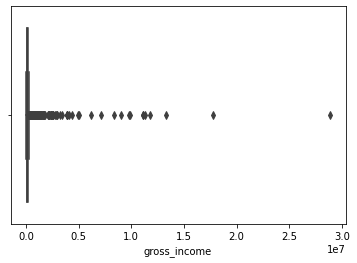

In [27]:
#Look at the graphs boxplot and histogram.
sea.boxplot(x = df2['gross_income'])
plt.show()


C:\Users\anishkaa.choudhary\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


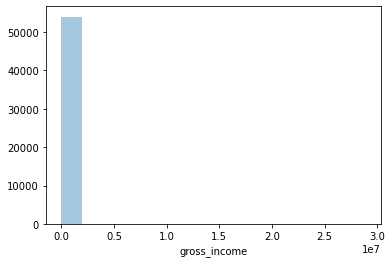

In [28]:
#Mean.Median and Mode at the same point(Normal : No Skew)
sea.distplot(df2['gross_income'], bins = 15 , kde = False)
plt.show()

In [29]:
'''There are many outliers and the data is right-skewed. Log transformation will transform data to normal 
or close to normal. Let’s apply the log transformation to reduce the variability of data.'''

import numpy as np
df_gross_income = np.log(df2['gross_income'])


In [30]:
df2['gross_income'].head()

0     79070.91
1    178270.68
2     31243.56
3    130740.54
4    112975.17
Name: gross_income, dtype: float64

In [31]:
df_gross_income.head()

0    11.278100
1    12.091058
2    10.349569
3    11.780970
4    11.634923
Name: gross_income, dtype: float64

<AxesSubplot:xlabel='gross_income'>

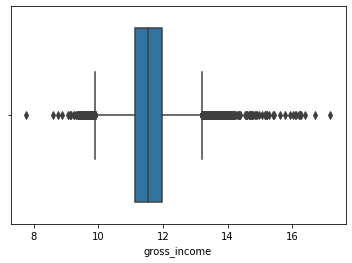

In [32]:
sea.boxplot(x = df_gross_income)

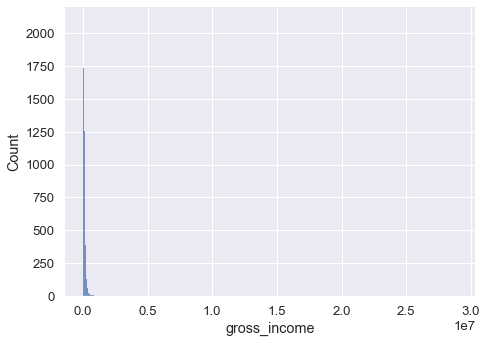

In [33]:
'''The displot function of Seaborn allows for creating 3 different types of distribution plots which are:
1. Histogram
2. Kde (kernel density estimate) plot
3. Ecdf plot'''

'''1st method The first example is to create a basic histogram.
It divides the value range of continuous variables into discrete bins and shows how many values exist in each bin.'''

import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)

sns.displot(
  data=df2,
  x="gross_income",
  kind="hist",
  aspect=1.4
)

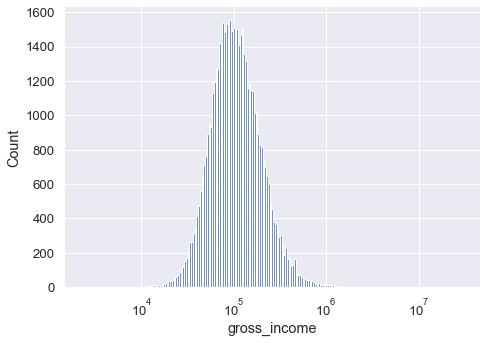

In [34]:
'''The histogram has a long tail to the right which indicates there are few houses with very high prices.
One method to reduce the effect of such outliers is to take the log of values.
The displot function can perform this operation using the log_scale parameter.'''

sns.displot(
  data=df2,
  x="gross_income",
  kind="hist",
  aspect=1.4,
  log_scale=10
)

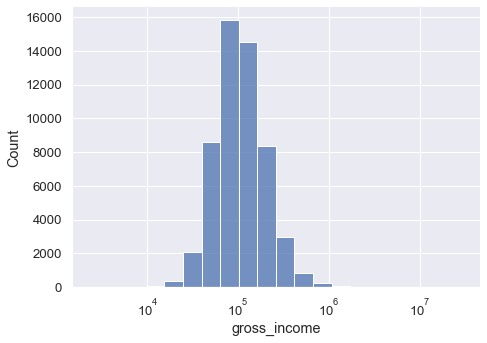

In [35]:
'''We can also adjust the number of bins in the histogram.
In some cases, it is preferred to have less number of bins so that we get a more structured overview.
The parameter to use for this adjustment is the bins.'''

sns.displot(
  data=df2,
  x="gross_income",
  kind="hist",
  aspect=1.4,
  log_scale=10,
  bins=20
)

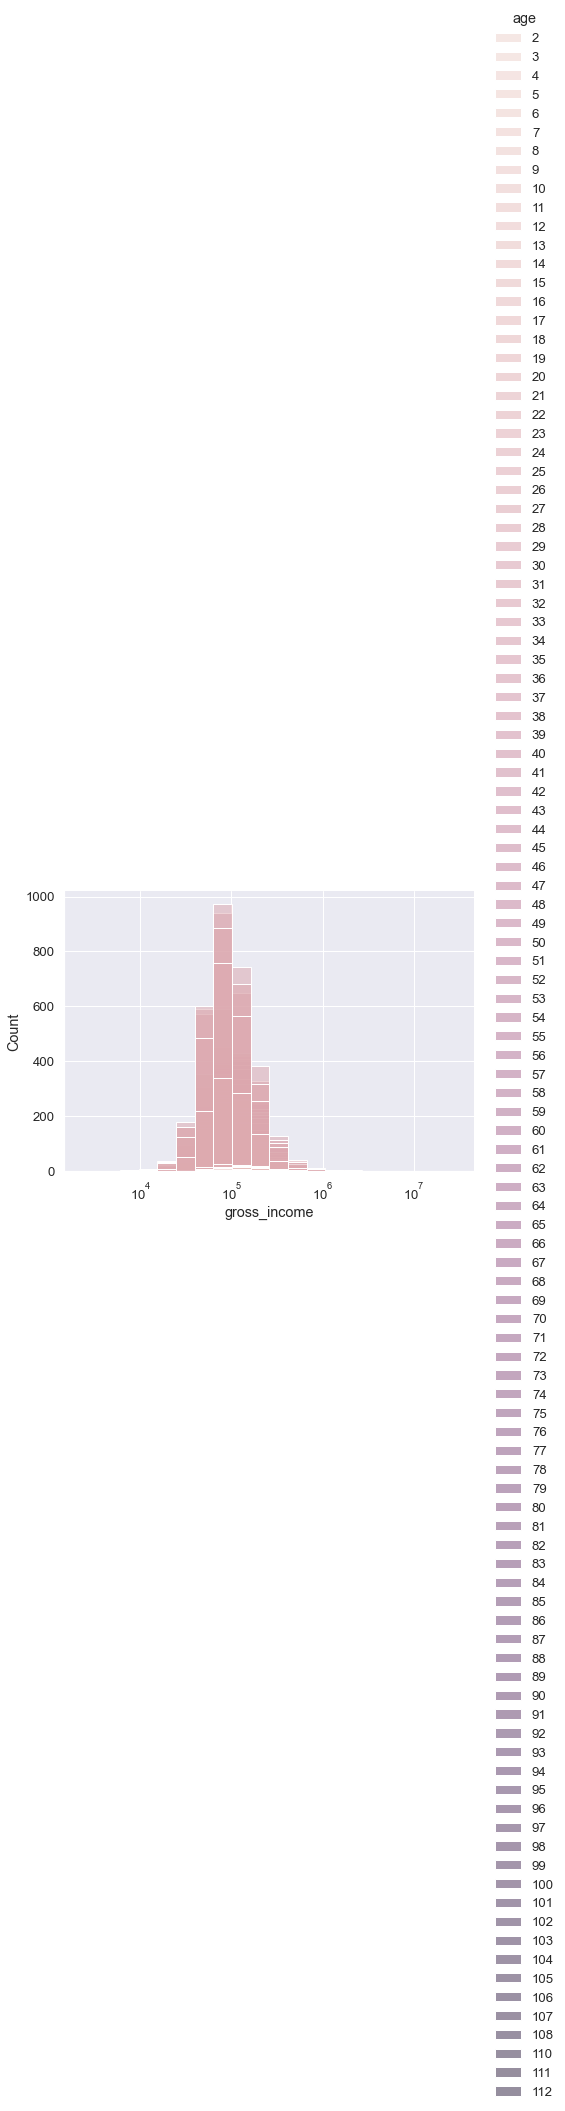

In [36]:
'''The dataset also contains categorical variables. 
For instance, the type column has 3 categories which are h (house), t (town house), and u (unit).
We may need to check the distribution of each type separately.
One option is to show them with different colors in the same visualization.
We just need to pass the name of the column to the hue parameter.'''


sns.displot(
  data=df2,
  x="gross_income",
  hue= "age",
  kind="hist",
  aspect=1.4,
  log_scale=10,
  bins=20
)

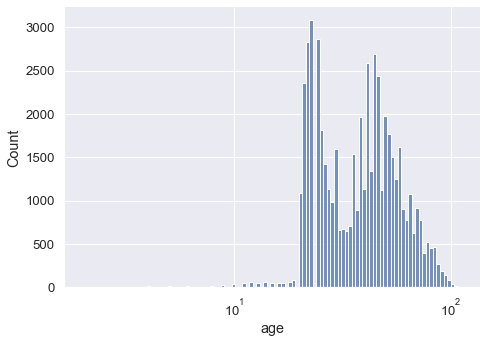

In [37]:
#Age
sns.displot(
  data=df2,
  x="age",
  kind="hist",
  aspect=1.4,
  log_scale=10
)

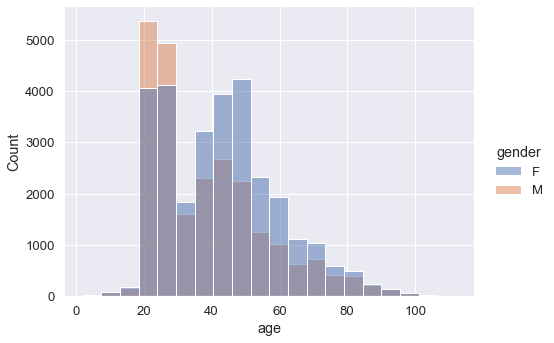

In [38]:
sns.displot(
  data=df2,
  x="age",
  hue= "gender",
  kind="hist",
  aspect=1.4,
  #log_scale=10,
  bins=20
)

In [120]:
df2.quantile([0.0,0.05,0.24,0.50,0.75,0.90,0.95,0.99,1])

,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0.00,21.0,40141.525500,0.0,0.0,0.0,0.0,0.0,366.00
0.05,21.0,40143.255525,0.0,0.0,0.0,0.0,0.0,607.45
0.24,25.0,67329.106800,0.0,0.0,0.0,1.0,0.0,1091.00
0.50,40.0,101566.320000,0.0,0.0,0.0,1.0,0.0,2039.50
0.75,51.0,156253.755000,0.0,1.0,1.0,2.0,0.0,4693.00
0.90,65.0,234387.876000,0.0,1.0,1.0,3.0,0.0,5844.00
0.95,74.0,310033.366500,0.0,1.0,1.0,5.0,0.0,6529.00
0.99,89.0,554718.455610,1.0,1.0,1.0,8.0,0.0,7432.71
1.00,89.0,554898.021000,1.0,1.0,1.0,13.0,1.0,7909.00


In [40]:
#Removing extreme values from  age
p_05 = df2['age'].quantile(0.05) # 5th quantile
p_95 = df2['age'].quantile(0.99) # 95th quantile

df2['age'].clip(p_05, p_95, inplace=True)

In [41]:
#Removing extreme values from gross_income
p_05 = df2['gross_income'].quantile(0.05) # 5th quantile
p_95 = df2['gross_income'].quantile(0.99) # 95th quantile

df2['gross_income'].clip(p_05, p_95, inplace=True)

# TASK 2

Task 2. Data Exploration and business hypothesis testing
1. For people who were inactive at the start of the study and were active by the time
the study ended, is there a pattern in terms of age and gender?
2. Do people with more than average annual income tend to have relatively high
activity rates compared to people with less than average annual income?
3. What is the relationship between the number of products owned by customers who
were active at the start and at the end vs those who were active at the start but were
inactive at the end of the study period?
4. How people who display consistent behaviour (active at start and active at end,
inactive at start and inactive at end) differ from people who display a change in their
behaviour (active at start but inactive at the end or inactive at start but active at
end)?
5. Generate elaborate profiles for the following four groups:
a. Active at the start but inactive at the end
b. Active at the start and active by the end
c. Inactive at the start but active at the end
d. Inactive at the start and inactive at the end

In [42]:
df2.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.9100,Individuals,0,0,0,1,0,1035
1,M,23,178270.6800,College_Graduated,0,0,0,1,0,1097
2,M,24,40141.5255,College_Graduated,0,0,1,1,0,1866
3,M,24,130740.5400,College_Graduated,0,0,0,1,0,1440
4,M,31,112975.1700,Individuals,0,0,0,0,0,376


In [43]:
'''1. For people who were inactive at the start of the study and were active by the time
the study ended, is there a pattern in terms of age and gender?'''

inact_start = df2[df2['tiprel_1mes'] == 0]
act_atend = inact_start[inact_start['ind_actividad_cliente'] == 1]
print(inact_start.shape, act_atend.shape)

print("Inactive at start --> Age mean: ", inact_start['age'].mean())
print("Inactive at start --> Age median: ", inact_start['age'].median())

print("Active at end --> Age mean: ", act_atend['age'].mean())
print("Active at end --> Age median: ", act_atend['age'].median())
print()
print("High age group people are moving from inactivity to activity that we can see from median")
print()

print("Inactive at start --> Gender Mode: ", (inact_start['gender'].value_counts()/inact_start.shape[0])*100)
print("active at end --> Gender Mode: ", (act_atend['gender'].value_counts()/act_atend.shape[0])*100)

(29026, 10) (2438, 10)
Inactive at start --> Age mean:  38.19020877833666
Inactive at start --> Age median:  32.0
Active at end --> Age mean:  39.77932731747334
Active at end --> Age median:  37.0

High age group people are moving from inactivity to activity that we can see from median

Inactive at start --> Gender Mode:  F    51.84662
M    48.15338
Name: gender, dtype: float64
active at end --> Gender Mode:  F    53.076292
M    46.923708
Name: gender, dtype: float64


In [44]:
inact_start = df2[df2['tiprel_1mes'] == 0]
act_atend = inact_start[inact_start['ind_actividad_cliente'] == 1]
print(inact_start.shape, act_atend.shape)

(29026, 10) (2438, 10)


In [45]:
print("Inactive at start --> Age mean: ", inact_start['age'].mean())
print("Inactive at start --> Age median: ", inact_start['age'].median())


Inactive at start --> Age mean:  38.19020877833666
Inactive at start --> Age median:  32.0


In [46]:
print("Active at end --> Age mean: ", act_atend['age'].mean())
print("Active at end --> Age median: ", act_atend['age'].median())
print()

Active at end --> Age mean:  39.77932731747334
Active at end --> Age median:  37.0



In [47]:
inact_start.describe()

,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,29026.000000,29026.000000,29026.000000,29026.0,29026.000000,29026.000000,29026.0,29026.000000
mean,38.190209,122353.465595,0.000207,0.0,0.083994,0.766347,0.0,2568.392682
std,17.269314,90028.396013,0.014376,0.0,0.277383,0.569127,0.0,1852.265195
min,21.000000,40141.525500,0.000000,0.0,0.000000,0.000000,0.0,366.000000
25%,24.000000,64820.070000,0.000000,0.0,0.000000,0.000000,0.0,1084.000000
50%,32.000000,95059.155000,0.000000,0.0,0.000000,1.000000,0.0,1776.000000
75%,48.000000,147059.557500,0.000000,0.0,0.000000,1.000000,0.0,3948.750000
max,89.000000,554898.021000,1.000000,0.0,1.000000,4.000000,0.0,7879.000000


In [48]:
df2.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.9100,Individuals,0,0,0,1,0,1035
1,M,23,178270.6800,College_Graduated,0,0,0,1,0,1097
2,M,24,40141.5255,College_Graduated,0,0,1,1,0,1866
3,M,24,130740.5400,College_Graduated,0,0,0,1,0,1440
4,M,31,112975.1700,Individuals,0,0,0,0,0,376


In [49]:
df2

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.9100,Individuals,0,0,0,1,0,1035
1,M,23,178270.6800,College_Graduated,0,0,0,1,0,1097
2,M,24,40141.5255,College_Graduated,0,0,1,1,0,1866
3,M,24,130740.5400,College_Graduated,0,0,0,1,0,1440
4,M,31,112975.1700,Individuals,0,0,0,0,0,376
...,...,...,...,...,...,...,...,...,...,...
54025,M,24,47237.0100,College_Graduated,0,0,1,1,0,1147
54026,F,46,106930.0500,Individuals,1,1,1,8,0,6061
54027,M,24,185323.0500,College_Graduated,0,0,0,0,0,1817
54028,F,27,65246.7900,College_Graduated,0,0,0,1,0,1447


In [50]:
print("High age group people are moving from inactivity to activity that we can see from median")
print()

print("Inactive at start --> Gender Mode: ", (inact_start['gender'].value_counts()/inact_start.shape[0])*100)
print("Active at end --> Gender Mode: ", (act_atend['gender'].value_counts()/act_atend.shape[0])*100)

High age group people are moving from inactivity to activity that we can see from median

Inactive at start --> Gender Mode:  F    51.84662
M    48.15338
Name: gender, dtype: float64
Active at end --> Gender Mode:  F    53.076292
M    46.923708
Name: gender, dtype: float64


In [51]:
'''2. Do people with more than average annual income tend to have relatively 
high activity rates compared to people with less than average annual income?'''
avg_income = df2['gross_income'].mean()
print("Average income = :", avg_income)





Average income = : 128275.58692193546


In [52]:
#Finding the gross income values greater than average.
Greater_values = pd.DataFrame()
Greater_values = df2[df2['gross_income'] >  df2['gross_income'].mean()]
Greater_values.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440
6,F,43,131281.50,Individuals,0,1,0,1,0,5022
7,M,48,184641.60,Individuals,0,1,1,1,0,4066
8,F,36,164347.86,VIP,0,1,1,1,0,1427


In [53]:
#Sum of all 1 (active at the end)
A = Greater_values.ind_actividad_cliente.sum()
print(A)

'''Another way : active_end = Greater_values[Greater_values['ind_actividad_cliente'] == 1]
print(active_end.shape)'''

9971


"Another way : active_end = Greater_values[Greater_values['ind_actividad_cliente'] == 1]\nprint(active_end.shape)"

In [54]:
Greater_values.shape[0]

19129

In [55]:
#Rate of all the 1's present in gross income by total number of gross income.
Rate = A / Greater_values.shape[0]
print(Rate*100)

52.12504574206702


In [56]:
#Finding the gross income values less than average.
less_values = pd.DataFrame()
less_values = df2[df2['gross_income'] <  df2['gross_income'].mean()]
less_values.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.9100,Individuals,0,0,0,1,0,1035
2,M,24,40141.5255,College_Graduated,0,0,1,1,0,1866
4,M,31,112975.1700,Individuals,0,0,0,0,0,376
5,F,32,40141.5255,Individuals,0,1,1,4,0,699
9,M,26,40141.5255,College_Graduated,0,0,1,1,0,1458


In [57]:
#Sum of all 1 (active at the end)
AA = less_values.ind_actividad_cliente.sum()
print(AA)

'''active_end1 = less_values[less_values['ind_actividad_cliente'] == 1]
print(active_end1.shape)'''

15373


"active_end1 = less_values[less_values['ind_actividad_cliente'] == 1]\nprint(active_end1.shape)"

In [58]:
less_values.shape[0]

34901

In [59]:
#Rate of all the 1's present in gross income by total number of gross income.
Rate2 = A / less_values.shape[0]
print(Rate2*100)

28.569381966132774


In [60]:
'''3. What is the relationship between the number of products owned by customers who were active at the start and
at the end vs those who were active at the start but were inactive at the end of the study period?'''

active_start = (df2[df2['tiprel_1mes'] == 1] )
active_end = active_start[active_start['ind_actividad_cliente'] == 1]
print(active_start.shape,active_end.shape)

active_end['num_Products'].sum()

(25004, 10) (22906, 10)


59112

In [66]:
#Active at start to inactive at the end
active_start = (df2[df2['tiprel_1mes']==1])
inactive_atend =(active_start[active_start['ind_actividad_cliente']==0])
print(active_start.shape,inactive_atend.shape)

inactive_atend['num_Products'].sum()

(25004, 10) (2098, 10)


1635

In [105]:
'''4. How people who display consistent behaviour (active at start and active at end, inactive at start and 
inactive at end) differ from people who display a change in their behaviour
(active at start but inactive at the end or inactive at start but active at end)?'''

# Case 1 : (Active at start and Active at end) OR (Inactive at start and Inactive at end)
Case1 = df2[((df2['tiprel_1mes'] == 1) & (df2['ind_actividad_cliente'] == 1))|
        ((df2['tiprel_1mes'] == 0) & (df2['ind_actividad_cliente'] == 0))]

print(Case1.shape)
# Case 2 : (Active at start and Inactive at end) OR (Inactive at start and active at end)

Case2 = df2[((df2['tiprel_1mes']) == 1 & (df2['ind_actividad_cliente'] == 0)) | 
            ((df2['tiprel_1mes'] == 0) & (df2['ind_actividad_cliente'] == 1))]

print(Case2.shape)

(49494, 10)
(4536, 10)


In [110]:
Case1.describe()

,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,49494.000000,49494.000000,49494.000000,49494.000000,49494.000000,49494.000000,49494.000000,49494.000000
mean,40.719138,128507.427949,0.054087,0.462804,0.462804,1.580838,0.009718,2905.256960
std,16.788820,91409.422899,0.226192,0.498620,0.498620,1.630273,0.098102,2017.987063
min,21.000000,40141.525500,0.000000,0.000000,0.000000,0.000000,0.000000,366.000000
25%,25.000000,68712.240000,0.000000,0.000000,0.000000,1.000000,0.000000,1131.000000
50%,39.000000,101729.505000,0.000000,0.000000,0.000000,1.000000,0.000000,2025.000000
75%,51.000000,156720.052500,0.000000,1.000000,1.000000,2.000000,0.000000,4654.000000
max,89.000000,554898.021000,1.000000,1.000000,1.000000,13.000000,1.000000,7909.000000


In [111]:
Case2.describe()

,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000
mean,42.060626,125745.882382,0.003968,0.462522,0.537478,1.046958,0.005511,3008.644180
std,17.995506,88046.604486,0.062876,0.498648,0.498648,0.656575,0.074043,2131.646434
min,21.000000,40141.525500,0.000000,0.000000,0.000000,0.000000,0.000000,366.000000
25%,25.000000,67465.807500,0.000000,0.000000,0.000000,1.000000,0.000000,1073.000000
50%,41.000000,99893.040000,0.000000,0.000000,1.000000,1.000000,0.000000,2310.500000
75%,53.000000,152412.082500,0.000000,1.000000,1.000000,1.000000,0.000000,5039.000000
max,89.000000,554898.021000,1.000000,1.000000,1.000000,4.000000,1.000000,7879.000000


In [64]:
'''5. Generate elaborate profiles for the following four groups:
a. Active at the start but inactive at the end
b. Active at the start and active by the end
c. Inactive at the start but active at the end
d. Inactive at the start and inactive at the end'''

# Active and Active

active_at_start = (df2[df2['tiprel_1mes'] == 1] )
active_at_end = active_at_start[active_start['ind_actividad_cliente'] == 1]
print(active_at_start.shape,active_at_end.shape)

#Inactive and Inactive

Inactive_at_start = (df2[df2['tiprel_1mes']==0])
Inactive_at_end =(Inactive_at_start[Inactive_at_start['ind_actividad_cliente']==0])
print(Inactive_at_start.shape,Inactive_at_end.shape)

#Active and Inactive

active_at_start1 = (df2[df2['tiprel_1mes']==1])
Inactive_at_end1 =(active_at_start1[active_at_start1['ind_actividad_cliente']==0])
print(active_at_start1.shape,Inactive_at_end1.shape)

#Inactive and active

Inactive_at_start1 = (df2[df2['tiprel_1mes']==0])
active_at_end1 =(Inactive_at_start1[Inactive_at_start1['ind_actividad_cliente']==1])
print(Inactive_at_start1.shape,active_at_end1.shape)




(25004, 10) (22906, 10)
(29026, 10) (26588, 10)
(25004, 10) (2098, 10)
(29026, 10) (2438, 10)


In [113]:
#Question 1 : Active and Active

active_at_start = (df2[df2['tiprel_1mes'] == 1] )
active_at_end = active_at_start[active_start['ind_actividad_cliente'] == 1]
print(active_at_start.shape,active_at_end.shape)

(25004, 10) (22906, 10)


In [112]:
active_at_end.describe()

,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,22906.000000,22906.000000,22906.000000,22906.0,22906.0,22906.000000,22906.000000,22906.00000
mean,43.823714,135663.533668,0.116782,1.0,1.0,2.580634,0.020999,3304.76910
std,15.669354,91996.074783,0.321167,0.0,0.0,1.879328,0.143383,2128.15378
min,21.000000,40141.525500,0.000000,1.0,1.0,0.000000,0.000000,366.00000
25%,32.000000,74152.507500,0.000000,1.0,1.0,1.000000,0.000000,1203.00000
50%,43.000000,110413.965000,0.000000,1.0,1.0,2.000000,0.000000,3202.00000
75%,52.000000,167160.345000,0.000000,1.0,1.0,3.000000,0.000000,5266.00000
max,89.000000,554898.021000,1.000000,1.0,1.0,13.000000,1.000000,7909.00000


In [114]:
#Question 2 : Inactive and Inactive

Inactive_at_start = (df2[df2['tiprel_1mes']==0])
Inactive_at_end =(Inactive_at_start[Inactive_at_start['ind_actividad_cliente']==0])
print(Inactive_at_start.shape,Inactive_at_end.shape)

(29026, 10) (26588, 10)


In [115]:
Inactive_at_end.describe()

,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,26588.000000,26588.000000,26588.000000,26588.0,26588.0,26588.000000,26588.0,26588.000000
mean,38.044494,122342.324985,0.000075,0.0,0.0,0.719498,0.0,2561.070671
std,17.254589,90449.835265,0.008673,0.0,0.0,0.549297,0.0,1850.117522
min,21.000000,40141.525500,0.000000,0.0,0.0,0.000000,0.0,366.000000
25%,24.000000,64591.252500,0.000000,0.0,0.0,0.000000,0.0,1084.000000
50%,32.000000,94768.905000,0.000000,0.0,0.0,1.000000,0.0,1774.000000
75%,48.000000,146964.390000,0.000000,0.0,0.0,1.000000,0.0,3903.000000
max,89.000000,554898.021000,1.000000,0.0,0.0,4.000000,0.0,7879.000000


In [116]:
#Question 3 : Active and Inactive

active_at_start1 = (df2[df2['tiprel_1mes']==1])
Inactive_at_end1 =(active_at_start1[active_at_start1['ind_actividad_cliente']==0])
print(active_at_start1.shape,Inactive_at_end1.shape)

(25004, 10) (2098, 10)


In [117]:
Inactive_at_end1.describe()

,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,2098.000000,2098.000000,2098.000000,2098.0,2098.0,2098.000000,2098.000000,2098.000000
mean,44.711630,129546.885997,0.006673,1.0,0.0,0.779314,0.011916,3427.450429
std,18.365449,90991.078021,0.081435,0.0,0.0,0.687383,0.108534,2327.815923
min,21.000000,40141.525500,0.000000,1.0,0.0,0.000000,0.000000,366.000000
25%,27.000000,68242.500000,0.000000,1.0,0.0,0.000000,0.000000,1010.250000
50%,44.000000,103546.155000,0.000000,1.0,0.0,1.000000,0.000000,3723.000000
75%,56.000000,155856.832500,0.000000,1.0,0.0,1.000000,0.000000,5462.500000
max,89.000000,554898.021000,1.000000,1.0,0.0,4.000000,1.000000,7794.000000


In [118]:
#Question 4 : Inactive and active

Inactive_at_start1 = (df2[df2['tiprel_1mes']==0])
active_at_end1 =(Inactive_at_start1[Inactive_at_start1['ind_actividad_cliente']==1])
print(Inactive_at_start1.shape,active_at_end1.shape)

(29026, 10) (2438, 10)


In [119]:
active_at_end1.describe()

,age,gross_income,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,2438.000000,2438.000000,2438.000000,2438.0,2438.0,2438.000000,2438.0,2438.000000
mean,39.779327,122474.961305,0.001641,0.0,1.0,1.277276,0.0,2648.244053
std,17.353375,85314.837345,0.040480,0.0,0.0,0.530003,0.0,1874.054211
min,21.000000,40141.525500,0.000000,0.0,1.0,0.000000,0.0,366.000000
25%,24.000000,67119.697500,0.000000,0.0,1.0,1.000000,0.0,1091.000000
50%,37.000000,97501.500000,0.000000,0.0,1.0,1.000000,0.0,1824.500000
75%,50.000000,148200.855000,0.000000,0.0,1.0,2.000000,0.0,4283.000000
max,89.000000,554898.021000,1.000000,0.0,1.0,4.000000,0.0,7879.000000
